In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Desktop\SKILLSAHEAD\Python\ml\loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
## last record
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
## how to check data type 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
## summary statistics 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
## how to check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data cleaning

In [9]:
## checking for missing value 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
### Handing missing values

df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [11]:
## replacing missing value with a specific value 
df_missing = df.fillna(value = 'Male')

In [12]:
df_missing = df.fillna({'Gender':'Male'})

In [13]:
df_missing['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [14]:
df_missing.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
## Replacing missing values in married column 

In [16]:
df_missing['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [17]:
import numpy as np

In [18]:
#df_missing['Married'].replace(np.nan, df_missing['Married'].mode()[0], inplace = True)

In [19]:
df_missing.fillna({'Married': df_missing['Married'].mode()[0]}, inplace = True)

In [20]:
df_missing.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
## Replacing the missing values in the Dependents column with mode
df_missing.fillna({'Dependents': df_missing['Dependents'].mode()[0]}, inplace = True)

In [22]:
df_missing.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
## count of values for self_employed

df_missing['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [24]:
## filling value for loan amount using mean
df_missing.fillna({'LoanAmount': df_missing['LoanAmount'].mean()}, inplace = True)

In [25]:
df_missing.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df_missing.fillna({'Self_Employed': df_missing['Self_Employed'].mode()[0]}, inplace = True)

In [27]:
df_missing.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
#df_missing.head(20)

In [29]:
##Replacing missing values with mode in loan amount  
df_missing.fillna({'LoanAmount': df_missing['LoanAmount'].mode()[0]}, inplace = True)

In [30]:
##Replacing missing values with mode in credit history 
df_missing.fillna({'Credit_History': df_missing['Credit_History'].mode()[0]}, inplace = True)

In [31]:
df_missing.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
df_missing.fillna({'Loan_Amount_Term': df_missing['Loan_Amount_Term'].mode()[0]}, inplace = True)

In [33]:
df_missing.fillna({'Self_Employed': df_missing['Self_Employed'].mode()[0]}, inplace = True)

In [34]:
df_missing.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [35]:
## importing visualization libary
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df2 = df_missing.drop(columns = ['Loan_ID'])

In [37]:
df2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
## importing Visualization libaries 
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Gender', ylabel='count'>

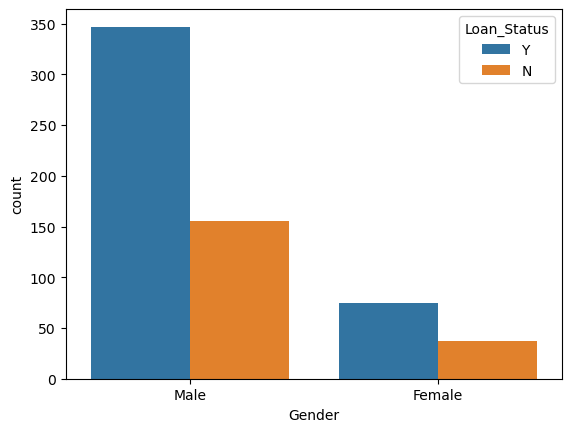

In [39]:
sns .countplot(x = 'Gender', hue = 'Loan_Status', data = df2)

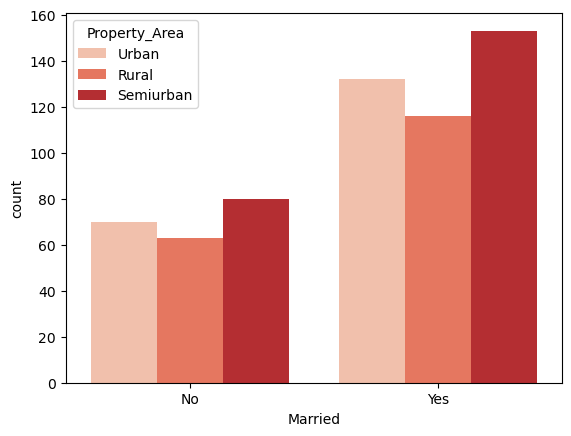

In [40]:
#### married and their properties 

sns .countplot(x = 'Married', hue = 'Property_Area', data = df2, palette = 'Reds');

In [41]:
## coutn of cutomers that applied for loan
loan_status_count = df2['Loan_Status'].value_counts()

In [42]:
loan_status_count

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [43]:
## Percentage of Loan Status 
loan_status_percentage = ((loan_status_count / loan_status_count.sum()) * 100).round(2)

In [44]:
loan_status_percentage

Loan_Status
Y    68.73
N    31.27
Name: count, dtype: float64

In [45]:
## correlation

loan_corr = df2.iloc[:, 5: 9]
loan_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,146.412162,360.0
1,4583,1508.0,128.000000,360.0
2,3000,0.0,66.000000,360.0
3,2583,2358.0,120.000000,360.0
4,6000,0.0,141.000000,360.0
...,...,...,...,...
609,2900,0.0,71.000000,360.0
610,4106,0.0,40.000000,180.0
611,8072,240.0,253.000000,360.0
612,7583,0.0,187.000000,360.0


In [46]:
correlation = df2.iloc[:, 5:9].corr()
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383
LoanAmount,0.565620,0.187828,1.000000,0.036475
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000


<Axes: >

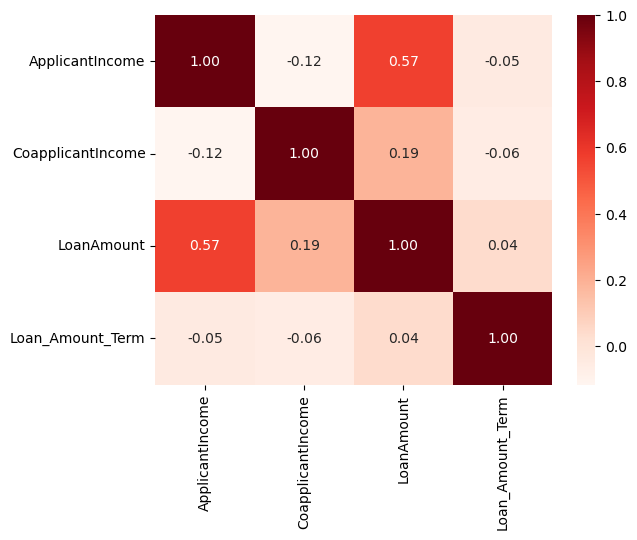

In [47]:
#plt.fi

sns.heatmap(correlation, fmt = '.2f',annot =True, cmap = 'Reds')

In [48]:
## pie chart

income_education = df2.groupby('Education')['ApplicantIncome'].sum()
income_education

Education
Graduate        2811568
Not Graduate     506156
Name: ApplicantIncome, dtype: int64

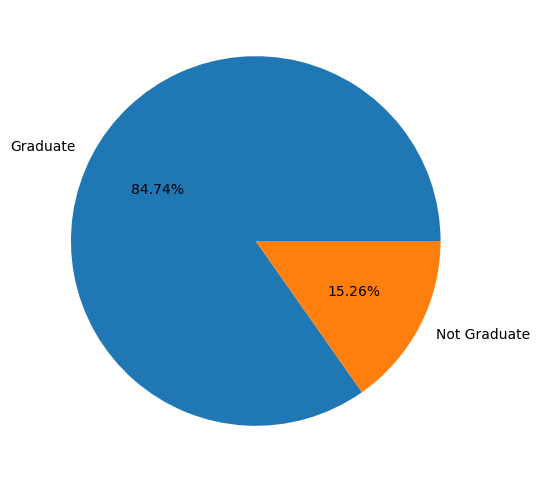

In [49]:
##ploting piechart
plt.figure(figsize=(8, 6))
plt.pie(income_education, autopct= '%1.2f%%', labels=income_education.index);

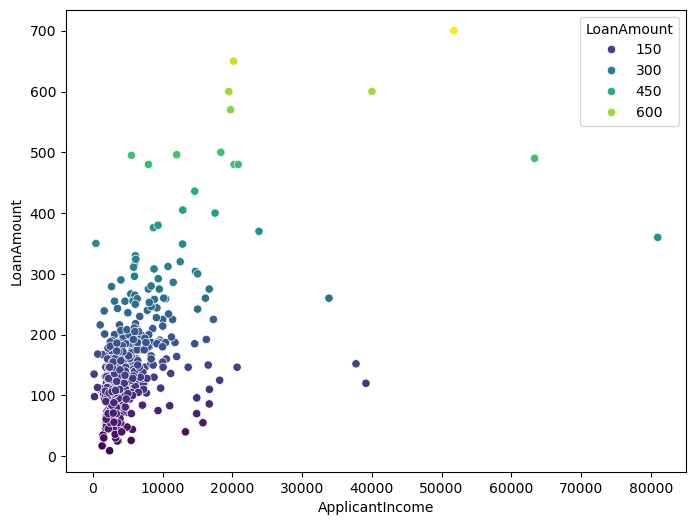

In [50]:
## scatter plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data = df2, x = 'ApplicantIncome', y= 'LoanAmount', hue= 'LoanAmount', palette = 'viridis');

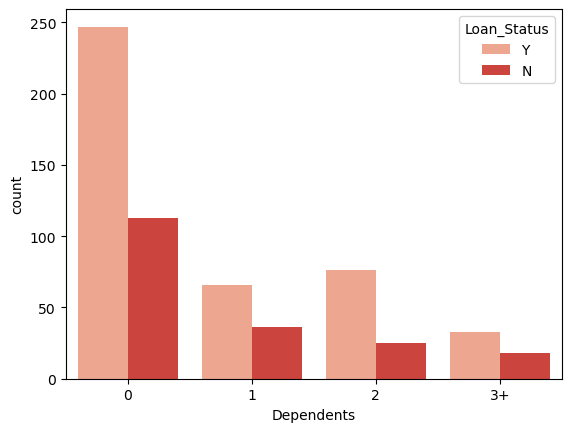

In [51]:
sns .countplot(x = 'Dependents', hue = 'Loan_Status', data = df2, palette = 'Reds');

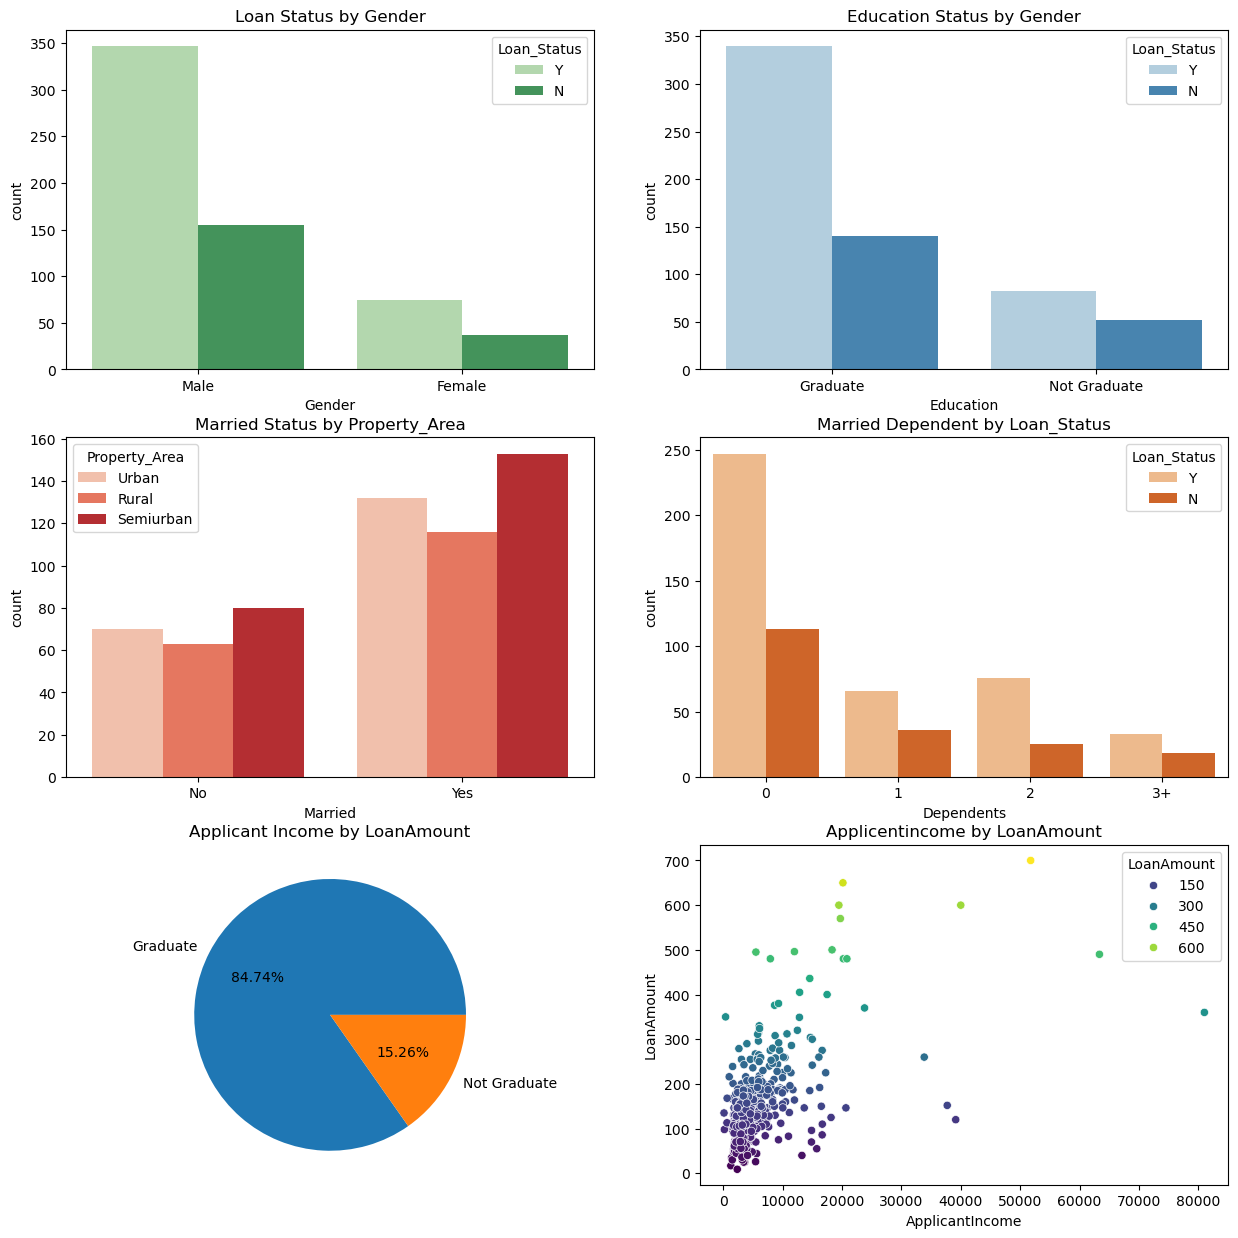

In [52]:
### dashboard showing all our charts

fig, axs = plt.subplots(3, 2, figsize = (15, 15))

##plotting my first subplot
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Greens', data = df2, ax = axs [0,0]);
axs[0,0].set_title('Loan Status by Gender');

sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Blues', data = df2, ax = axs [0,1]);
axs[0,1].set_title('Education Status by Gender');

sns.countplot(x = 'Married', hue = 'Property_Area', palette = 'Reds', data = df2, ax = axs [1,0]);
axs[1,0].set_title('Married Status by Property_Area');

sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Oranges', data = df2, ax = axs [1,1]);
axs[1,1].set_title('Married Dependent by Loan_Status');

axs[2,0].pie(income_education, autopct= '%1.2f%%', labels= income_education.index);
axs[2,0].set_title('Applicant Income by LoanAmount');

sns.scatterplot(data = df2, x = 'ApplicantIncome', y = 'LoanAmount', hue = 'LoanAmount', palette = 'viridis', ax = axs [2,1]);
axs[2,1].set_title('Applicentincome by LoanAmount');

plt.savefig('charts.png')

## machine learning 

In [53]:
#to split our data into training and test data
from sklearn.model_selection import train_test_split

##to check the accuracy of the model 
from sklearn.metrics import accuracy_score

In [54]:
#### Renaming the loan Statue to target column
df2.rename(columns = {'target': 'Loan_Status'}, inplace = True)

In [55]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [56]:
df2['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [57]:
#Cnverti ng catergorical column to numerical for our model to be able to predict 
pd.set_option('future.no_silent_downcasting', True)
df2['Gender'] = df2['Gender'].replace({'Female':0, 'Male':1}).astype(int)
df2['Married'] = df2['Married'].replace({'No':0, 'Yes':1}).astype(int)
df2['Education'] = df2['Education'].replace({'Not Graduate':0, 'Graduate':1}).astype(int)
df2['Self_Employed'] = df2['Self_Employed'].replace({'No':0, 'Yes':1}).astype(int)

In [58]:
df_dummies = pd.get_dummies(df2, columns = ['Property_Area'])
df_dummies = df_dummies.drop(columns = ['Property_Area_Semiurban'])

In [59]:
df_dummies

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Y,False,True
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,N,True,False
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Y,False,True
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Y,False,True
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Y,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Y,True,False
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,Y,True,False
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Y,False,True
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Y,False,True


In [60]:
df_dummies

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Y,False,True
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,N,True,False
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Y,False,True
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Y,False,True
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Y,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Y,True,False
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,Y,True,False
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Y,False,True
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Y,False,True


In [61]:
df_dummies['Property_Area_Urban'] = df_dummies['Property_Area_Urban'].replace({True: 1, False: 0})
df_dummies['Property_Area_Rural'] = df_dummies['Property_Area_Rural'].replace({True: 1, False: 0})




In [62]:
# Converting the loan status to integer
df_dummies['Loan_Status'] = df2['Loan_Status'].replace({'N':0, 'Y':1}).astype(int)


In [63]:
df_dummies

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,0
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1


In [64]:
#df_dummies.rename(columns={'loan_Status': 'Target'}, inplace=True)

In [65]:
df_dummies['Loan_Status'] = df_dummies['Loan_Status'].replace({'N':0, 'Y':1}).astype(int)


In [66]:
df_dummies

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,0
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1


In [67]:
df_dummies.replace('3+', 4, inplace = True)

In [68]:
df_dummies.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1


In [69]:
x = df_dummies.drop(columns = 'Loan_Status', axis = 1)
y = df_dummies['Loan_Status']

In [70]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [71]:
x.shape

(614, 12)

In [72]:
df_dummies

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1


In [73]:
df_dummies

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1,0
610,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,1,1,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,0,1


## Train Text Split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 33)

In [75]:
df_dummies.shape, x_train.shape, x_test.shape

((614, 13), (491, 12), (123, 12))

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [77]:
scaler

StandardScaler()

In [78]:
## fir tranform data
x_train_scaled = scaler.fit_transform(x_train)

In [79]:
x_train_scaled

array([[-2.12528914, -1.42508393, -0.67085765, ..., -2.47304307,
        -0.63155396,  1.37413074],
       [ 0.47052421, -1.42508393, -0.67085765, ...,  0.40436012,
        -0.63155396, -0.72773279],
       [ 0.47052421,  0.70171306,  2.56640139, ...,  0.40436012,
         1.58339599, -0.72773279],
       ...,
       [ 0.47052421,  0.70171306,  0.13845711, ...,  0.40436012,
         1.58339599, -0.72773279],
       [ 0.47052421,  0.70171306,  2.56640139, ...,  0.40436012,
         1.58339599, -0.72773279],
       [ 0.47052421,  0.70171306, -0.67085765, ..., -2.47304307,
        -0.63155396,  1.37413074]])

In [80]:
x_test_scaled = scaler.transform(x_test)


In [81]:
x_test_scaled

array([[ 0.47052421,  0.70171306,  0.94777187, ...,  0.40436012,
         1.58339599, -0.72773279],
       [ 0.47052421, -1.42508393, -0.67085765, ...,  0.40436012,
        -0.63155396,  1.37413074],
       [-2.12528914, -1.42508393, -0.67085765, ...,  0.40436012,
         1.58339599, -0.72773279],
       ...,
       [ 0.47052421,  0.70171306,  0.94777187, ...,  0.40436012,
        -0.63155396,  1.37413074],
       [ 0.47052421, -1.42508393, -0.67085765, ...,  0.40436012,
        -0.63155396,  1.37413074],
       [-2.12528914,  0.70171306, -0.67085765, ...,  0.40436012,
        -0.63155396, -0.72773279]])

In [82]:
## fir transform is only perform for the traning data to avoid data leakage 

In [83]:
## for classiffication model we can 
#support vector machine
#logistics
#Random Forest

In [84]:
#classification alogrithm
from sklearn import svm

In [85]:
classifier = svm.SVC(kernel = 'linear')

In [86]:
classifier.fit(x_train_scaled, y_train)

SVC(kernel='linear')

# Model Evaluation 

In [87]:
##predicting the accuracy of the model
x_train_prediction = classifier.predict(x_train_scaled)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [88]:
print('training Data Accuracy score:', training_data_accuracy)

training Data Accuracy score: 0.8065173116089613


In [89]:
x_test_prediction = classifier.predict(x_test_scaled)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [90]:
print('Test Data Accuracy score:', test_data_accuracy)

Test Data Accuracy score: 0.8211382113821138


# making a predictive system 

In [91]:
df_dummies.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Urban'],
      dtype='object')

In [92]:
import numpy as np
import warnings
#supress specific warnings 
warnings.filterwarnings("ignore", category=UserWarning)

In [93]:
input_data = (1,0,0,1,0,5849,0.0,146.41216216216216,360.0,1.0,0,1)

###changing the input data to numpy array to make the processing more efficient 
convert_data_to_numpy = np.asarray(input_data)

##reshaping the array to a one detapoint 
##(1 -1) for reshaping my numpy array
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardzing the input 
std_data = scaler.transform(reshape_input_data)

prediction = classifier.predict(std_data)
print(prediction)

## writting and if statement 
if prediction == 0:
    print('sorry, your loan has not been approved')
else:
    print('congratulations, you are eligible for the loan')

[1]
congratulations, you are eligible for the loan


In [94]:
merged_df = pd.concat([x, y], axis = 1)

In [95]:
merged_df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Urban,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,1
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,0,1,1
6,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,0,1,1
7,1,1,4,1,0,3036,2504.0,158.000000,360.0,0.0,0,0,0
8,1,1,2,1,0,4006,1526.0,168.000000,360.0,1.0,0,1,1
9,1,1,1,1,0,12841,10968.0,349.000000,360.0,1.0,0,0,0


In [96]:
merged_df.shape

(614, 13)

In [97]:
merged_df.to_csv('cleaned_data.csv', index = False)

In [98]:
import pickle

In [99]:
### Converting to a picke file
filename = 'loan_classifier.sav'

In [100]:
pickle.dump(classifier, open('loan_classifier.sav', 'wb'))
# wb write binary 

In [101]:
## loading the model 
loaded_model = pickle.load(open('loan_classifier.sav', 'rb'))

In [102]:
#!pip install streamlit

In [103]:
input_data = (1,0,0,1,0,5849,0.0,146.41216216216216,360.0,1.0,0,1)

###changing the input data to numpy array to make the processing more efficient 
convert_data_to_numpy = np.asarray(input_data)

##reshaping the array to a one detapoint 
##(1 -1) for reshaping my numpy array
reshape_input_data = convert_data_to_numpy.reshape(1, -1)

#standardzing the input 
std_data = scaler.transform(reshape_input_data)

prediction = loaded_model.predict(std_data)
print(prediction)

## writting and if statement 
if prediction == 0:
    print('sorry, your loan has not been approved')
else:
    print('congratulations, you are eligible for the loan')

[1]
congratulations, you are eligible for the loan
